# Portfolio
- Goals
    - Utilise different machine learnign models to train the financial data and build portfolio of stocks
- Data
    - Preprocess in path "data/~"
    - The data include five table from TEJ database, which include ~ 

## 1. Data

In [1]:
%load_ext autoreload
%autoreload 2'
# Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc, pickle, warnings

from train import summary
from utils import *
warnings.filterwarnings('ignore')

""" 
# in colab
!pip install optuna
# mount
from google.colab import drive
drive.mount('/content/drive')
# path
os.chdir('/content/drive/MyDrive/portfolio/data')
import sys
sys.path.append(sys.path[0] + f"/drive/MyDrive/portfolio") # current path + ~
"""

########################################
# data
industry = "automobile"
"""
# In Colab
with open(f"{sys.path[-1]}/data/{industry}/data4model.pickle", "rb") as f:
    data = pickle.load(f)
"""
# PC get data
with open(f"data/{industry}/data4model.pickle", "rb") as f:
    data = pickle.load(f)

# preprocess; most preprocess are done in data file, eg. standardise, ...
data = data.reset_index()
data["ymd"] = pd.to_datetime(data["ymd"], format="%Y-%m-%d")
data = data.set_index(["code", "ymd"])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##  2. Train

### 2.1 Build porfolio and rolling prediciton
- result in
    - result/industry/
    - result/industry/train_size_year_?

In [5]:
def rolling_prediction(model_name, model_config):
    
    portfolio = summary(model_name, data, **model_config)

    performance_rolling = pd.DataFrame()
    rplsw_rolling = pd.DataFrame()
    market_rolling = pd.DataFrame()
    max_date = max(data.reset_index()["ymd"])

    while True:

        result = portfolio.build_portfolio()

        # 1. performance: portfolio returns
        # 2. rplsw: returns, predicted, long_bound, short_bound, weight
        # 3. market: market returns
        if len(result) == 3:
            (performance, rplsw, market) = result
            performance_rolling = pd.concat([performance_rolling, performance], axis = 0)
            rplsw_rolling = pd.concat([rplsw_rolling, rplsw], axis = 0)
            market_rolling = pd.concat([market_rolling, market], axis = 0)
        elif result == None:
            # f"Warning: Sample size too small -> size {splited_data[0].shape}"
            continue
        else:    
            # "Weird data: too many dates in test data, expect 1!"
            break

        portfolio.train_test_update()
        print(portfolio.test_start)
        print(performance)
        if portfolio.test_start > max_date:
            break

    store_result(model_name, model_config, (performance_rolling, market_rolling, rplsw_rolling))

In [8]:

models = \
        {
        1: "linear",
        2: "elastic net",
        3: "decision tree", 
        4: "random forest", 
        5: "xgboost", 
        6: "svm",
        7: "ensemble", 
        8: "neural network",
        }

model_config = \
        {
        "industry": "automobile",
        "train_size": 5,    
        "test_size": 1,     
        "test_start": 2021,  

        "long_bound": 80,       
        "short_bound": 20,        
        "ls_decision": ["test", "no running"],
        "n_trials": 1,      
        "tune": True,
        "short": True, 
        "input_size": 89   # = input size | original dimension = input_size: 89
        }

for i in models:
    try:
        model_name = models[i]
        rolling_prediction(model_name, model_config)
    except:
        pass

param: {}
2021-02-01 00:00:00
   performance        ymd
0    -0.029118 2021-01-11
param: {}
2021-03-01 00:00:00
   performance        ymd
0     0.028926 2021-02-09
param: {}
2021-04-01 00:00:00
   performance        ymd
0     0.170701 2021-03-10
param: {}
2021-05-01 00:00:00
   performance        ymd
0    -0.015443 2021-04-12
param: {}
2021-06-01 00:00:00
   performance        ymd
0    -0.064659 2021-05-10
param: {}
2021-07-01 00:00:00
   performance        ymd
0     0.095279 2021-06-10
param: {}
2021-08-01 00:00:00
   performance        ymd
0    -0.033054 2021-07-12
param: {}
2021-09-01 00:00:00
   performance        ymd
0     0.181732 2021-08-10
param: {}
2021-10-01 00:00:00
   performance        ymd
0     0.003451 2021-09-10
param: {}
2021-11-01 00:00:00
   performance        ymd
0     0.176282 2021-10-12
param: {}
2021-12-01 00:00:00
   performance        ymd
0    -0.014566 2021-11-10
param: {}
2022-01-01 00:00:00
   performance        ymd
0    -0.019306 2021-12-10
param: {}
2022-0

2.1.3 Backtest\
`# subplots vs subplot?`

market performance ==================
market_mean: 0.1384795173451961, market_vol: 0.19459484931267879
market: sharpe ratio 0.7116299215231772


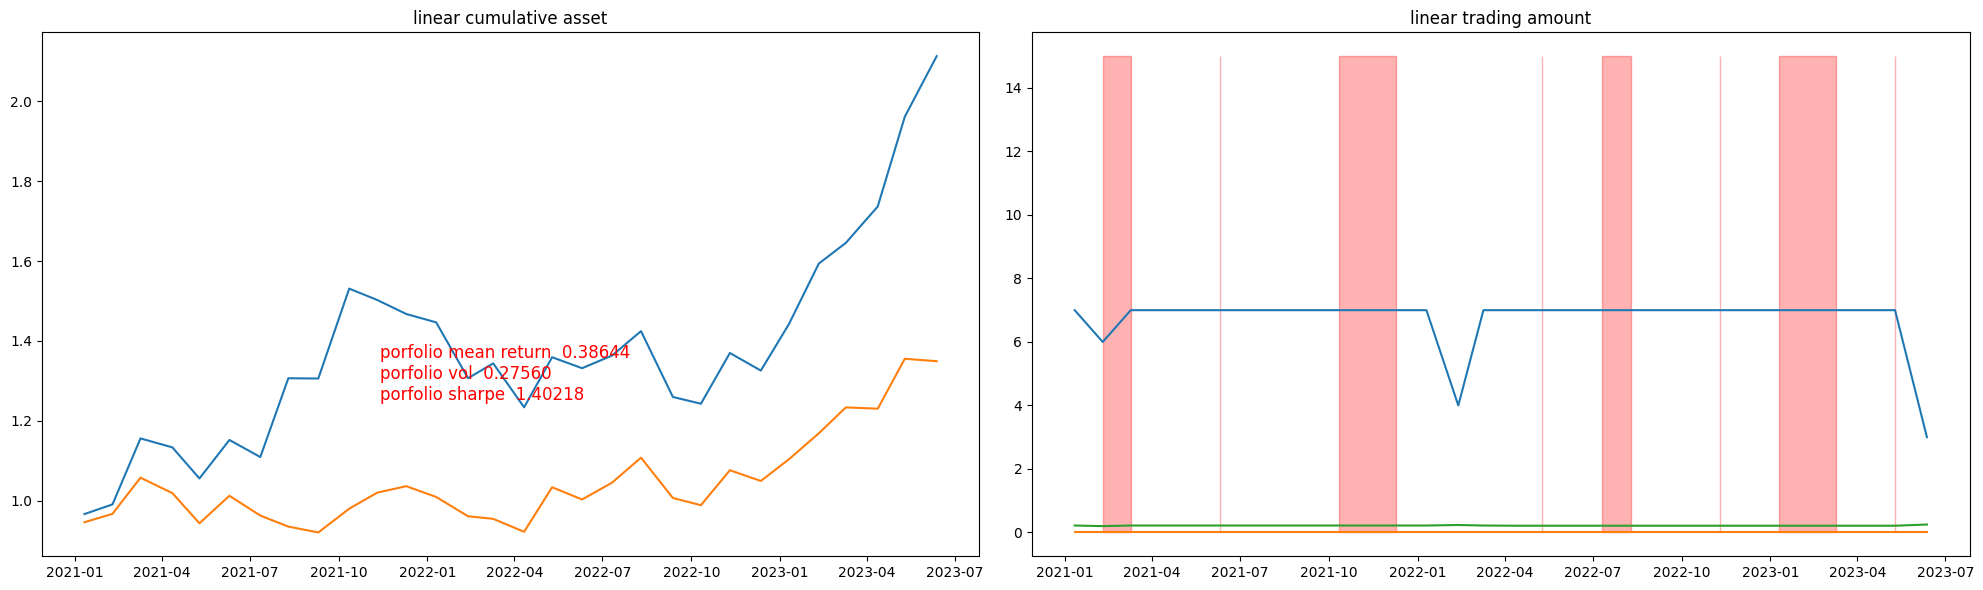

In [2]:

models = \
        {
        1: "linear",
        2: "elastic net",
        3: "decision tree", 
        4: "random forest", 
        5: "xgboost", 
        6: "svm",
        7: "ensemble", 
        8: "neural network",
        }

model_config = \
        {
        "industry": "automobile",
        "train_size": 5,    
        "test_size": 1,     
        "test_start": 2021,  

        "long_bound": 80,       
        "short_bound": 20,        
        "ls_decision": ["test", "no running"],
        "n_trials": 1,      
        "tune": True,
        "short": True, 
        "input_size": 89   # = input size | original dimension = input_size: 89
        }

model_name = models[1]
plot_model_result(industry, model_name, model_config)

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


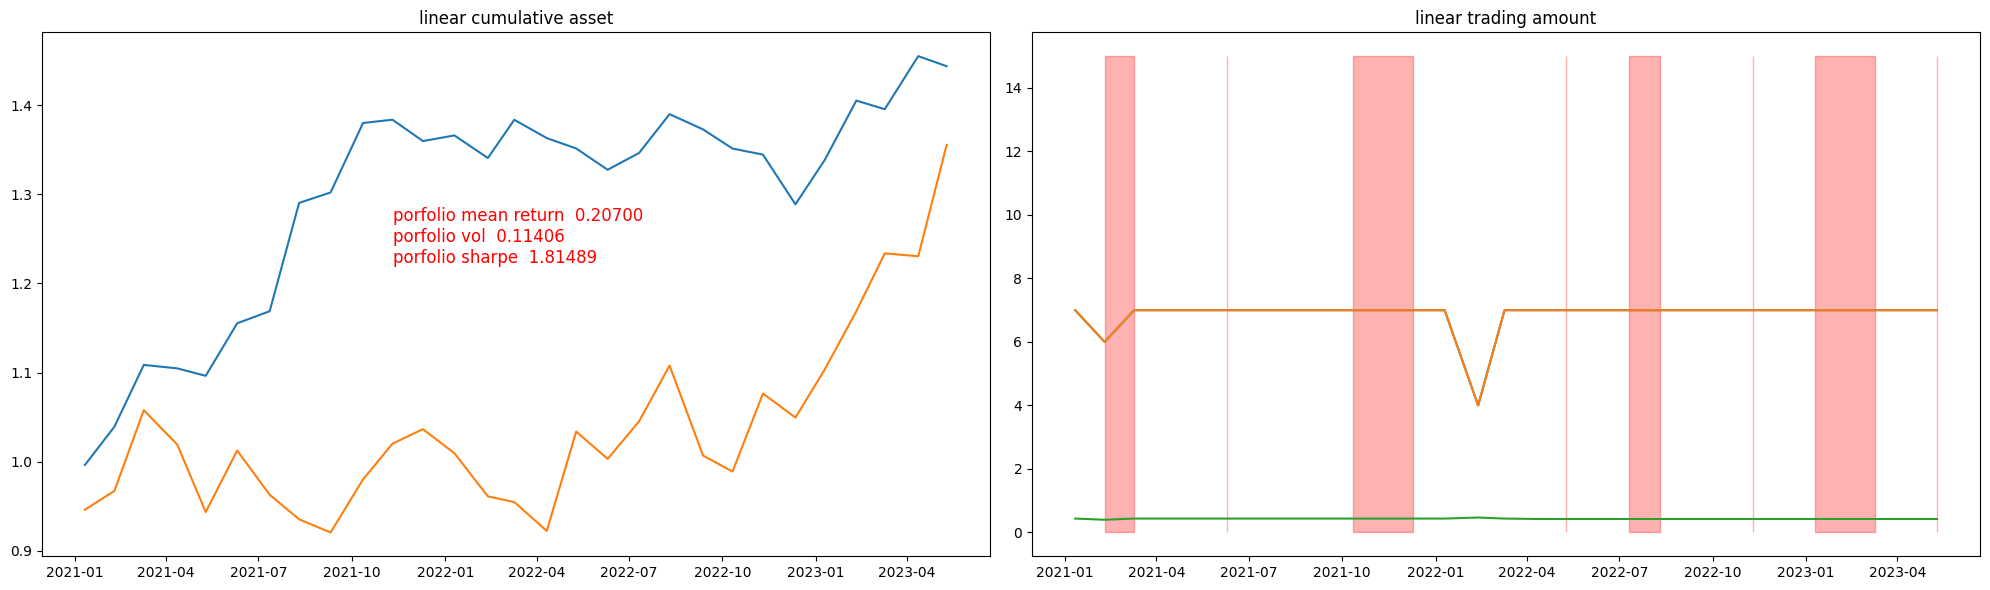

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


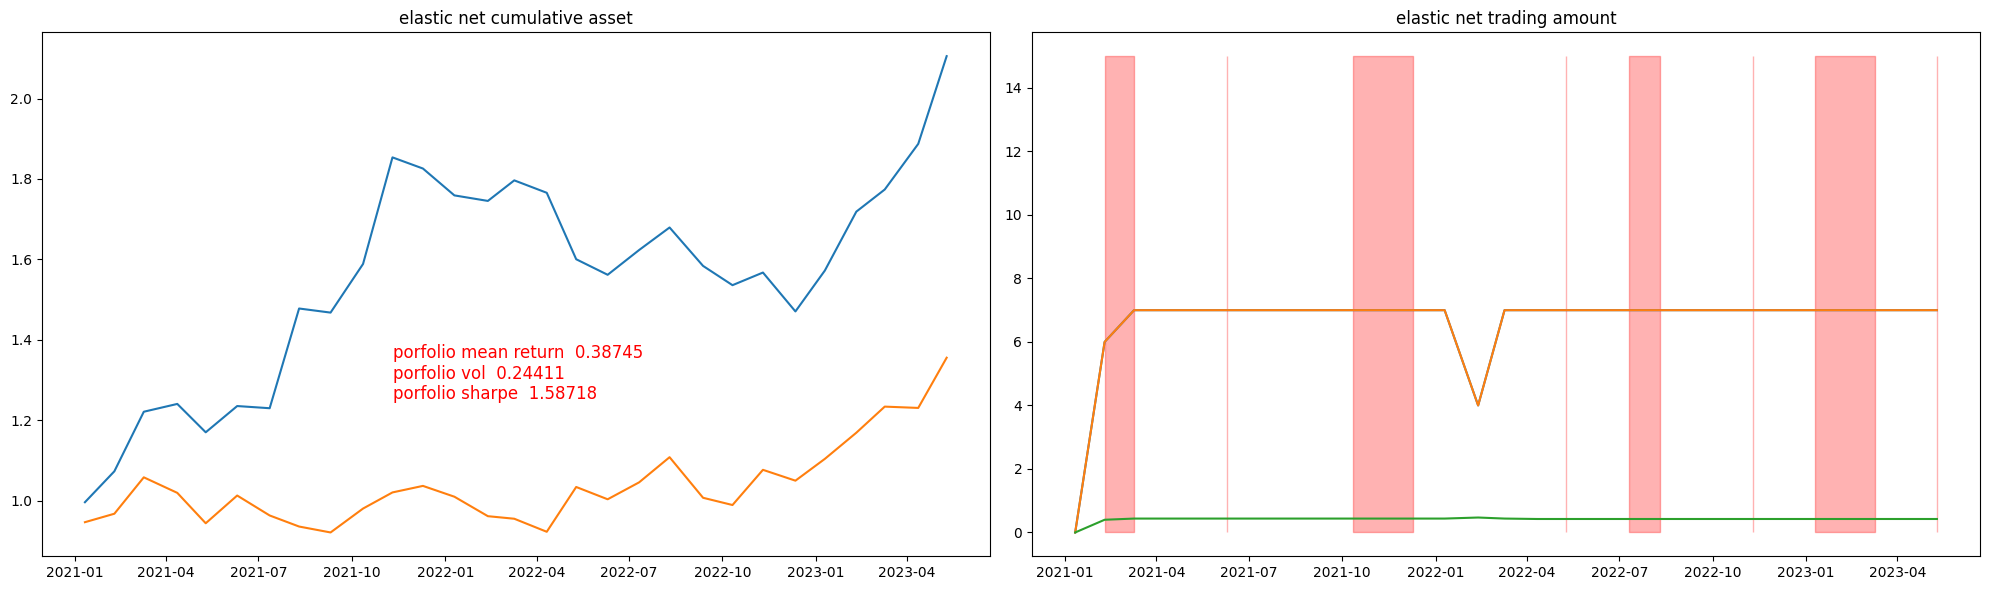

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


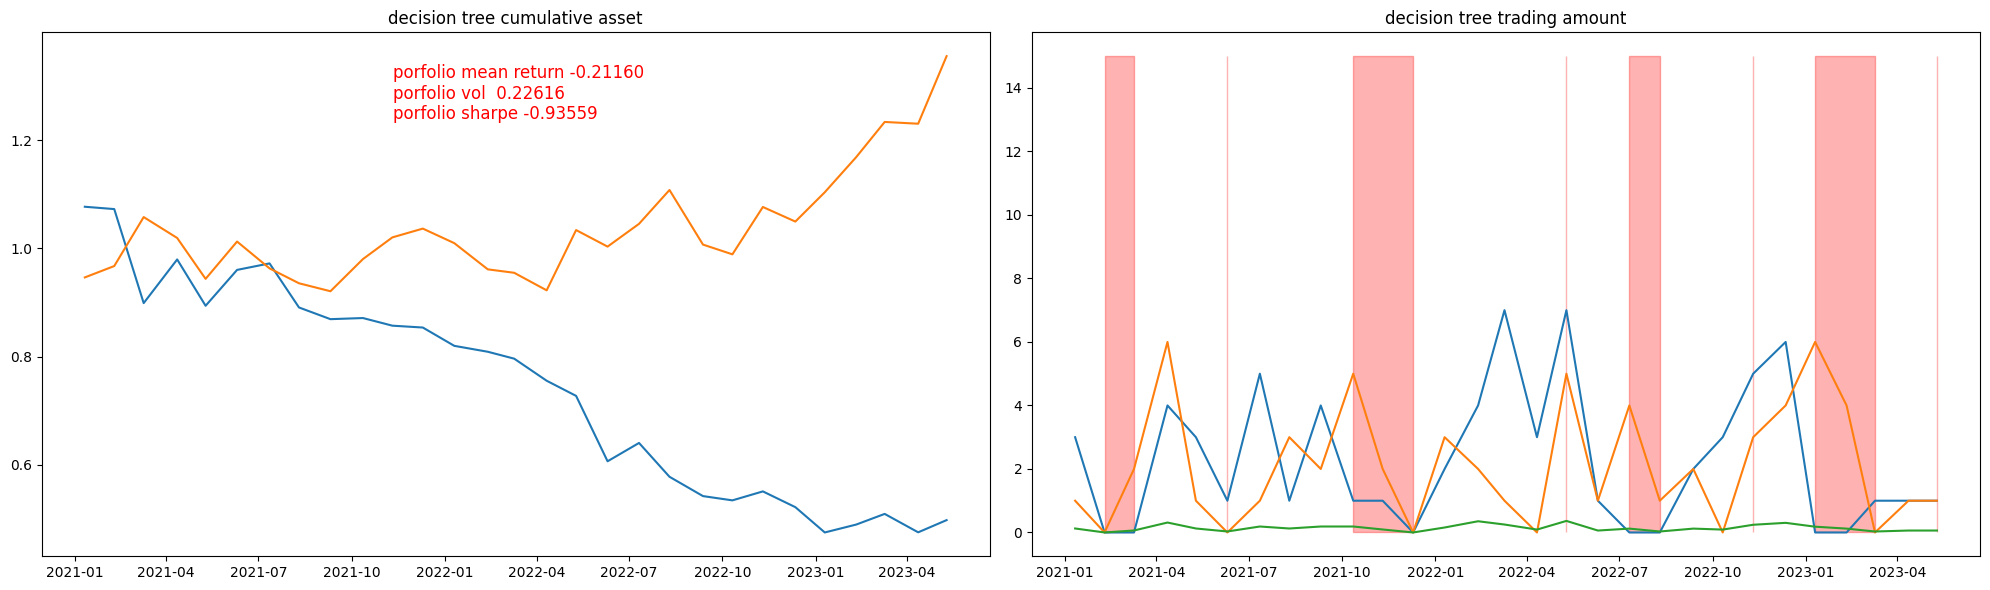

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


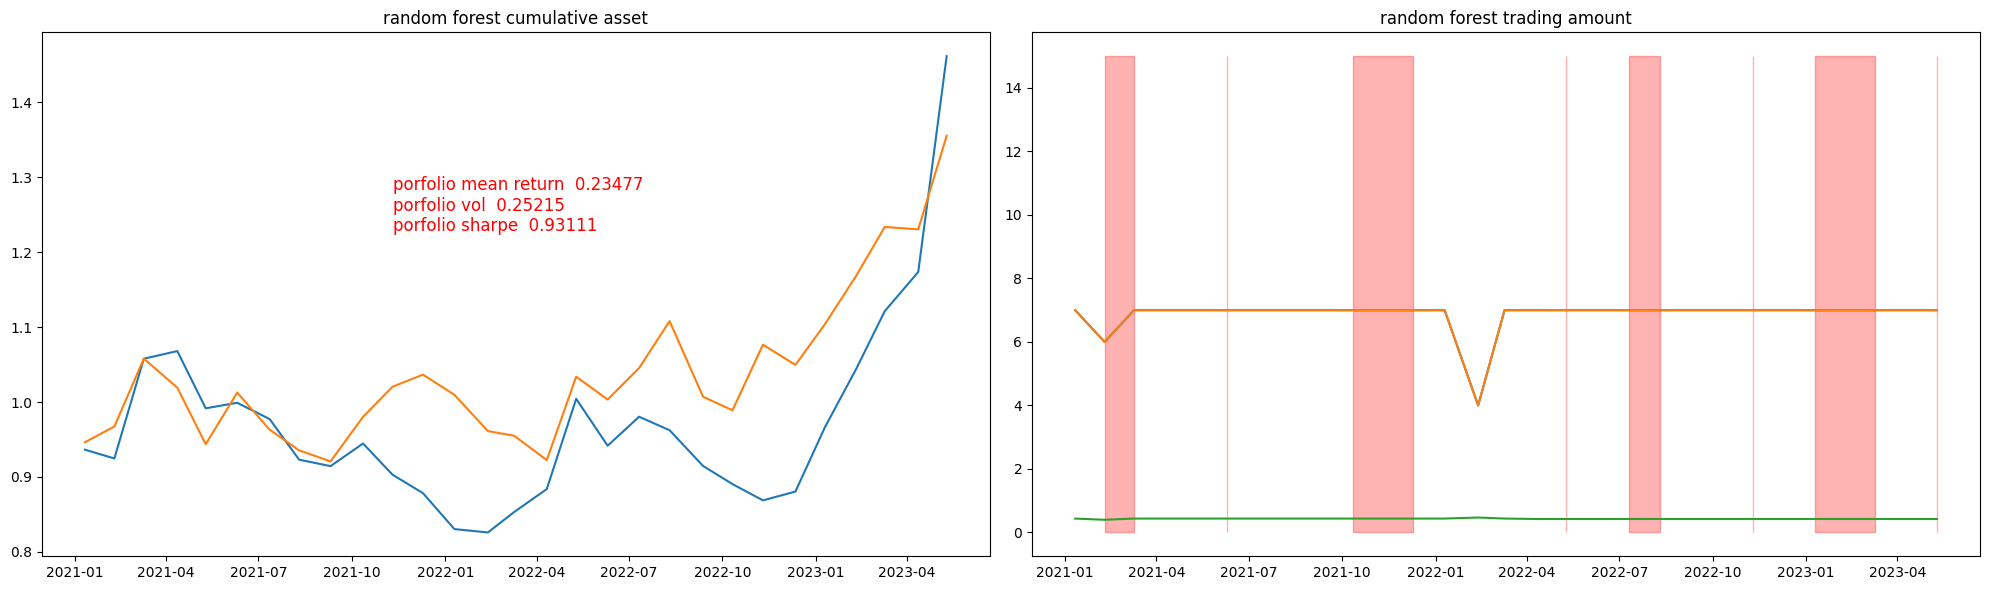

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


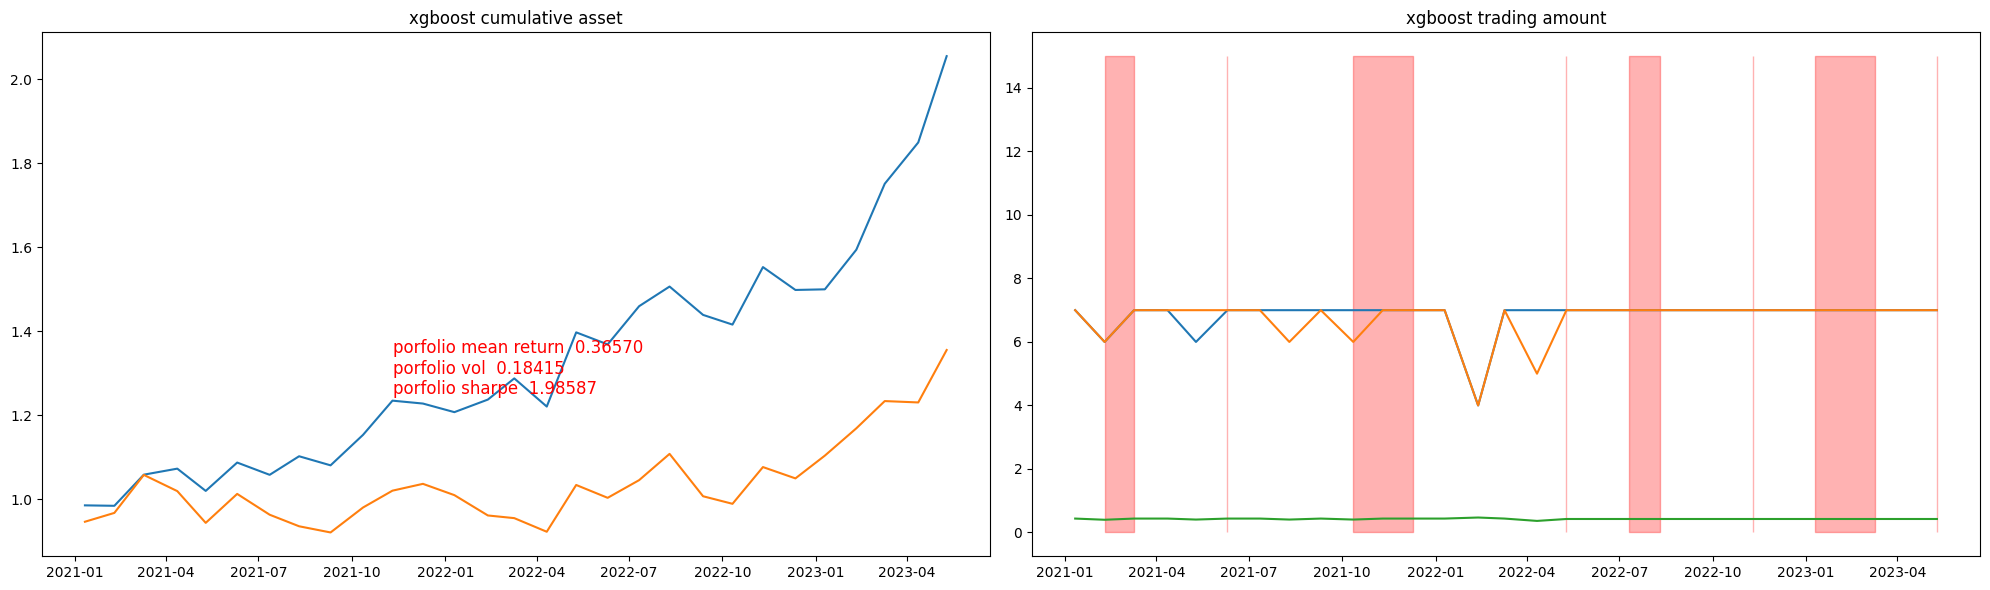

market performance ==================
market_mean: 0.1451056759389666, market_vol: 0.1977520383322563
market: sharpe ratio 0.7337758799490346


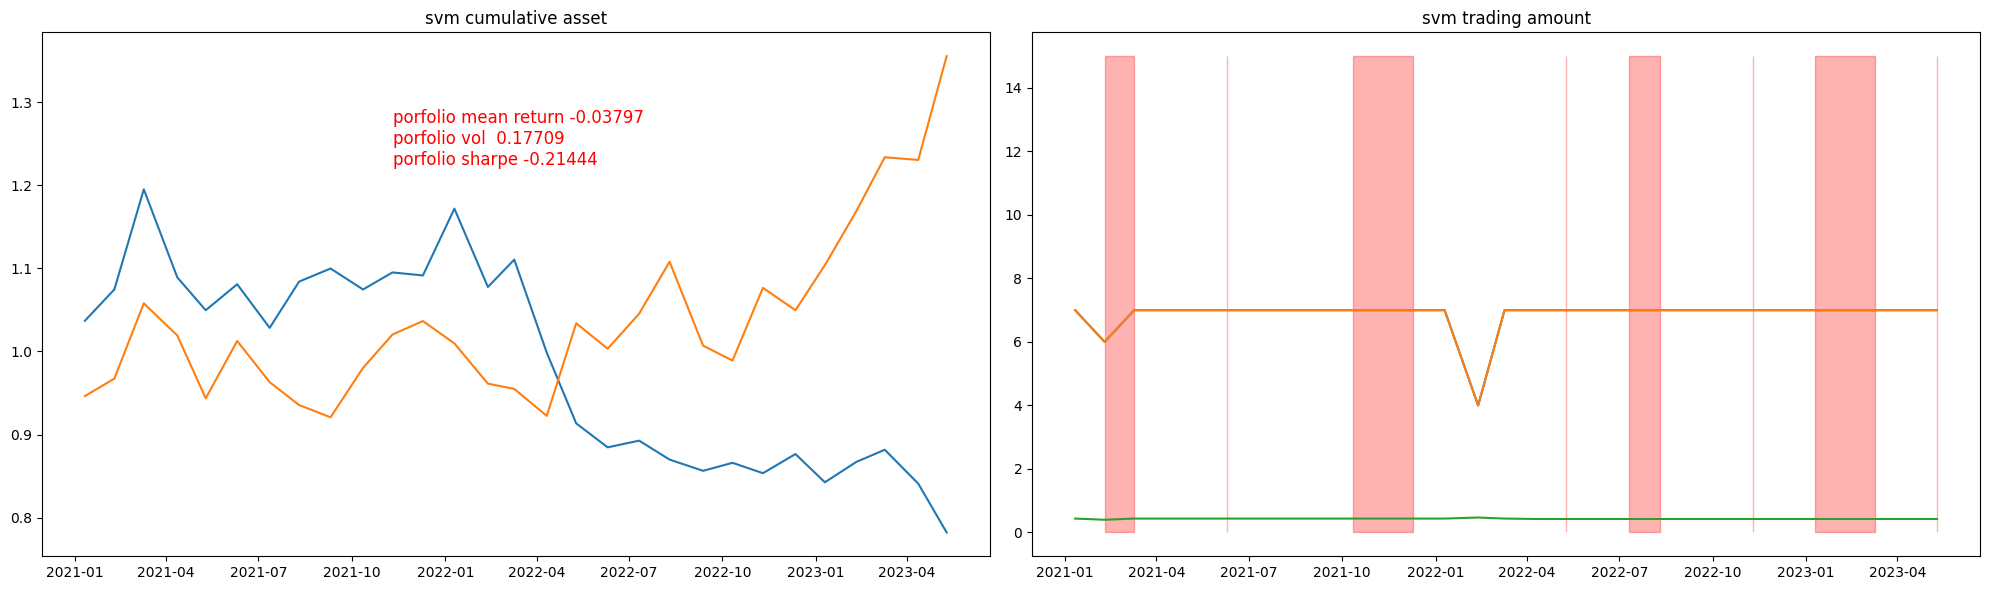

In [145]:
industry = "automobile"
models = {1: "linear",
         2: "elastic net",
         3: "decision tree", 
         4: "random forest", 
         5: "xgboost", 
         6: "svm", 
         7: "ensemble",
         8: "neural network",
         }


for i in models:
    if i == 7:
        break
    model = models[i]
    plot_model_result(industry, model)
    # performance_rolling, market_rolling, rplsw_rolling = models_get_result(industry, model)
    # n_long, n_short, trading_rate = trading(rplsw_rolling)
    break

In [137]:
models[:6]

TypeError: unhashable type: 'slice'

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# other 
import gc
import pickle
from pandas.errors import DatabaseError
import warnings
warnings.filterwarnings('ignore')

# 主要的train size year: 5 years
def load_result(model, model_strategy): 
    if model == "neural network":
        model_ = f"{model} with number of trials {model_strategy['n_trials']}"
    else:
        model_ = model
        
    # load result
    if model_strategy["train_size"] == 5:
        with open(
            f"result/{industry}/{model_}.pickle", 
            "rb") as f:
            a = pickle.load(f)
        
    else:
        with open(
            f"result/{industry}/result_train{model_strategy['train_size']}test{model_strategy['test_size']}/{model_}.pickle", 
            "rb") as f:
            a = pickle.load(f)
    performance_rolling, loss_rolling, rplsw_rolling, market_rolling = a
    return performance_rolling, loss_rolling, rplsw_rolling, market_rolling


industry = "automobile"
models = {1: "linear",
         2: "elastic net",
         3: "decision tree", 
         4: "random forest", 
         5: "xgboost", 
         6: "svm", 
         7: "ensemble",
         8: "neural network",
         }
print(models)
model = models[1]
model_strategy = {
        "model": model,     # "linear" or "decision tree" or "xgboost" or "svm" or "neural network"
        "long": 80,         # percentile
        "short": 20,        # percentile
        "train_size": 5,    # y
        "test_size": 1,     # m
        "test_year": 2021,  # start test from 2021/01
        "n_trials": 1,
        }
performance_rolling, loss_rolling, rplsw_rolling, market_rolling = load_result(model, model_strategy)
performance_mean = performance_rolling.mean().values[0]*12
performance_vol = performance_rolling.std().values[0]*(12**(1/2))
market_mean = market_rolling.mean().values[0]*12
market_vol = market_rolling.std().values[0]*(12**(1/2))

print("####################################################")
print(f"{model} performance ==================")
print(f"performance_mean: {performance_mean}, performance_vol: {performance_vol}")
print(f"market performance ==================")
print(f"market_mean: {market_mean}, market_vol: {market_vol}")
print(".......................")
print(f"{model}: sharpe ratio \
        {performance_mean/performance_vol}")
print(f"market: sharpe ratio \
        {market_mean/market_vol}")

# Trading amount
n_trading = []
n_total = []
n_long = []
n_short = []
trading_rate = []
date_trade = []
rplsw_rolling = rplsw_rolling.reset_index()
for date in rplsw_rolling["ymd"].unique():
    short_trading = rplsw_rolling[(rplsw_rolling["pred_ls"] == -1) & (rplsw_rolling["ymd"] == date)]
    long_trading = rplsw_rolling[(rplsw_rolling["pred_ls"] == 1) & (rplsw_rolling["ymd"] == date)]
    n_long.append(len(long_trading))
    n_short.append(len(short_trading))
    n_trading.append(len(long_trading) + len(short_trading))
    n_total.append(len(rplsw_rolling[rplsw_rolling["ymd"] == date]))
    trading_rate.append((len(long_trading) + len(short_trading)) / len(rplsw_rolling[rplsw_rolling["ymd"] == date]))
    date_trade.append(date)
n_long = pd.DataFrame(n_long, columns= ["n_long"]).set_index([date_trade])
n_short = pd.DataFrame(n_short, columns= ["n_short"]).set_index([date_trade])
n_trading = pd.DataFrame(n_trading, columns= ["n_trading"]).set_index([date_trade])
n_total = pd.DataFrame(n_total, columns= ["n_total"]).set_index([date_trade])
trading_rate = pd.DataFrame(trading_rate, columns= ["trading_rate"]).set_index([date_trade])

plt.figure(figsize=(15, 8))
plt.plot(n_long, label = "long")
plt.plot(n_short, label = "short")
# plt.plot(n_trading)
# plt.plot(n_total)
# plt.plot(trading_rate)
market_rolling["return"] = market_rolling["return"]*100
plt.plot(market_rolling.set_index("ymd"), label = "market")
# Shade the region where market_rolling > 0
market_rollings = market_rolling.copy()
market_rollings["return"] = np.where(market_rollings["return"] > 0, 15, -1)
plt.fill_between(market_rollings["ymd"], 0, market_rollings["return"],
                where=(market_rollings["return"] > 0), facecolor = "red", color='red', alpha=0.3, label='market > 0')
plt.legend()
plt.show()


,performance,return
ymd,,
2021-01-11,0.000501,-0.053667
2021-02-09,0.055507,0.022237
2021-03-10,0.069417,0.093601
